In [1]:
import numpy as np
from scipy.sparse import diags
from scipy import sparse
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

## Initial conditions

In [2]:
hbar = 1      # Natural units, adimensional. Otherwise use hbar = 1.0545718176461565e-34 J s
omega =1      # Angular frequency of SHO in MeV
m=1           # Mass in MeV
epsilon=-0.05  # Anharmonic parameter in MeV^4
dx    = 0.01  # spatial separation in MeV^{-1}
x     = np.arange(-10, 10, dx)


# Potential $V(x)$

In [3]:
V=0.5*(omega**2)*m*x**2+epsilon*x**3
V0 = diags(V)  # potential
V0.toarray()

array([[1.00000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.97501999e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.95007996e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.49101350e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.96004000e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.99000500e-02]])

## Laplace operator approximated by three point finite differences

##  $\frac{\partial^2 \psi(x_n)}{\partial x^2}\approx\frac{1}{dx}\left[\frac{\psi(x_{n+1})-2\psi(x_{n})+\psi(x_{n-1})}{dx}\right]=\frac{1}{dx^2}
{\tiny\begin{pmatrix}
-2&1&0&0&\cdots&0\\
1&-2&1&0&\cdots&0\\
0&1&-2&1&\cdots&0\\
0&0&1&-2&\cdots&0\\
\vdots&\vdots&\vdots&\vdots&\ddots&\vdots\\
0&0&0&0&\cdots&-2
\end{pmatrix}
\begin{pmatrix}
\psi(x_0)\\
\psi(x_1)\\
\psi(x_2)\\
\psi(x_3)\\
\vdots\\
\psi(x_N)\\
\end{pmatrix}}$

In [4]:
D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2 ##Laplace operator in finite differences
D2.toarray()*dx**2

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

## Hamiltonian

In [5]:
H=- 0.5 *(hbar**2 / m)* D2 + V0

In [6]:
H.toarray()

array([[10100.        , -5000.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [-5000.        , 10099.75019995, -5000.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        , -5000.        , 10099.5007996 , ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
        10000.14910135, -5000.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
        -5000.        , 10000.0996004 , -5000.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        , -5000.        , 10000.04990005]])

## Diagonalization

In [7]:
energies, states = eigs(H,k=10, which='SR')

In [8]:
energies

array([0.49646337+0.j, 1.47658348+0.j, 2.43491382+0.j, 3.36875017+0.j,
       4.27443038+0.j, 4.73892416+0.j, 5.14664056+0.j, 5.9767124 +0.j,
       6.74529468+0.j, 7.13113112+0.j])

In [9]:
states

array([[-1.94621447e-17+0.j,  4.76641191e-17+0.j,  2.42401729e-17+0.j,
        ...,  1.50097387e-17+0.j, -8.54045348e-17+0.j,
         5.44662759e-17+0.j],
       [-4.74718324e-17+0.j,  7.72689118e-17+0.j,  1.65576077e-17+0.j,
        ...,  9.62858533e-18+0.j, -1.54554962e-16+0.j,
         7.24266648e-17+0.j],
       [-8.84281848e-17+0.j,  1.18416665e-16+0.j,  6.08762800e-17+0.j,
        ...,  3.88669450e-17+0.j, -2.47169855e-16+0.j,
         1.24060730e-16+0.j],
       ...,
       [ 7.43291370e-14+0.j,  3.20308771e-12+0.j, -1.07794325e-10+0.j,
        ...,  2.17473750e-05+0.j,  3.56594477e-04+0.j,
         5.33416546e-03+0.j],
       [ 4.95562111e-14+0.j,  2.13585509e-12+0.j, -7.18910069e-11+0.j,
        ...,  1.45124910e-05+0.j,  2.37993687e-04+0.j,
         3.56028918e-03+0.j],
       [ 2.47670563e-14+0.j,  1.06807253e-12+0.j, -3.59540747e-11+0.j,
        ...,  7.26054870e-06+0.j,  1.19076570e-04+0.j,
         1.78140605e-03+0.j]])

(-10.0, 20.0)

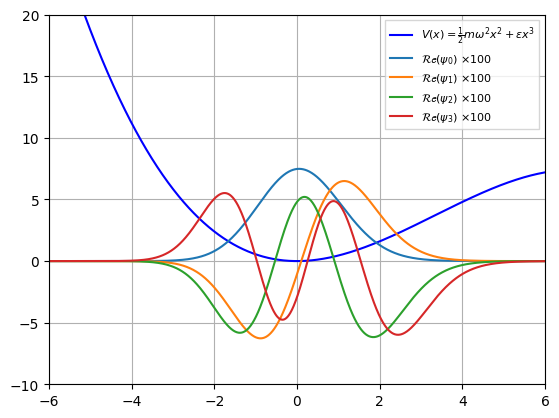

In [10]:
plt.plot(x,V,"b", label=r"$V(x)=\frac{1}{2}m\omega^2 x^2+\epsilon x^3$")
plt.plot(x,100*states[:,0].real, label=r"$\mathcal{Re}(\psi_0)$ $\times 100$")
plt.plot(x,100*states[:,1].real, label=r"$\mathcal{Re}(\psi_1)$ $\times 100$")
plt.plot(x,100*states[:,2].real, label=r"$\mathcal{Re}(\psi_2)$ $\times 100$")
plt.plot(x,100*states[:,3].real, label=r"$\mathcal{Re}(\psi_3)$ $\times 100$")
plt.grid()
plt.legend(loc=1, fontsize=8, fancybox=False)
plt.xlim(-6,6)
plt.ylim(-10,20)

(-10.0, 20.0)

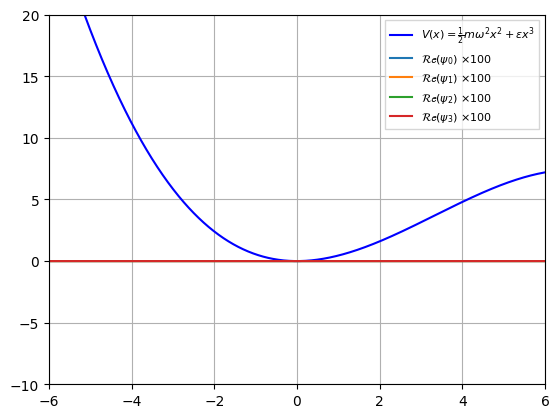

In [11]:
plt.plot(x,V,"b", label=r"$V(x)=\frac{1}{2}m\omega^2 x^2+\epsilon x^3$")
plt.plot(x,100*states[:,0].imag, label=r"$\mathcal{Re}(\psi_0)$ $\times 100$")
plt.plot(x,100*states[:,1].imag, label=r"$\mathcal{Re}(\psi_1)$ $\times 100$")
plt.plot(x,100*states[:,2].imag, label=r"$\mathcal{Re}(\psi_2)$ $\times 100$")
plt.plot(x,100*states[:,3].imag, label=r"$\mathcal{Re}(\psi_3)$ $\times 100$")
plt.grid()
plt.legend(loc=1, fontsize=8, fancybox=False)
plt.xlim(-6,6)
plt.ylim(-10,20)

Text(0, 0.5, 'energy [MeV]')

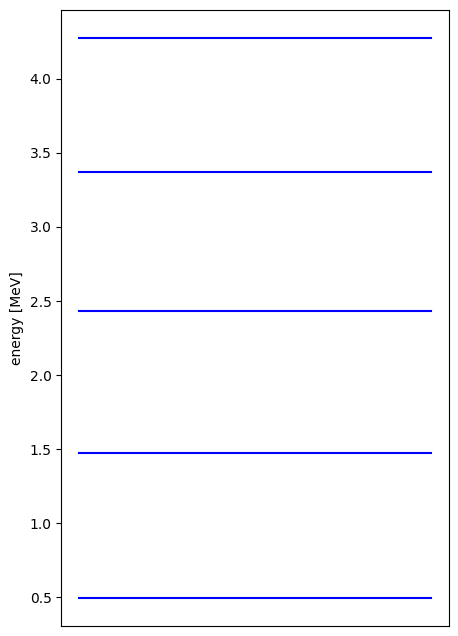

In [12]:
fig = plt.figure(figsize=(5,8))
ax = fig.gca()
levels = [[(0, 1), (e.real, e.real)] for e in energies]
for level in levels[:5]:
    ax.plot(level[0], level[1], '-b')
ax.set_xticks([])
ax.set_ylabel('energy [MeV]')